<a href="https://colab.research.google.com/github/Bhavi663/resume/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 3:- Edge detection, Line detection and corner detection

Objectives
 * find the edge in the image
 * corner detection with harris corner detector
 * Line detection

Lab exercise
1.) Compute the edge detection using sobel, prewitt and canny operator

2.) Implement the harris corner detector algorithm to determine the corner of the image

3.) Implement the harris corner detector algorithm without using the inbuilt Opencv() function

4.) Detect the line using hough transform

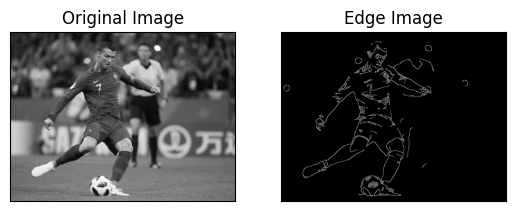

In [2]:


import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/ronaldo.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

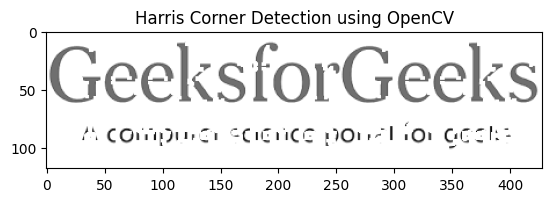

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/image_for_corner_detection.png', cv2.IMREAD_GRAYSCALE)


dst = cv2.cornerHarris(image, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

corner_image = np.copy(image)
corner_image[dst > 0.01 * dst.max()] = 255

plt.imshow(corner_image, cmap='gray')
plt.title('Harris Corner Detection using OpenCV')
plt.show()

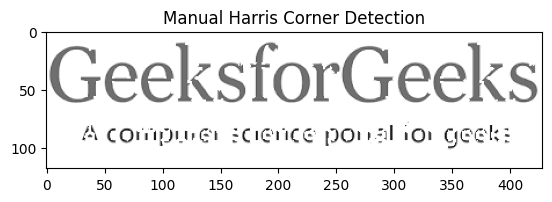

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/image_for_corner_detection.png', cv2.IMREAD_GRAYSCALE)

Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix * Iy

Ix2 = cv2.GaussianBlur(Ix2, (3, 3), sigmaX=1)
Iy2 = cv2.GaussianBlur(Iy2, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)


k = 0.04
detM = (Ix2 * Iy2) - (Ixy**2)
traceM = Ix2 + Iy2
R = detM - k * (traceM**2)

threshold = 0.01 * R.max()
corner_image = np.copy(image)
corner_image[R > threshold] = 255

plt.imshow(corner_image, cmap='gray')
plt.title('Manual Harris Corner Detection')
plt.show()

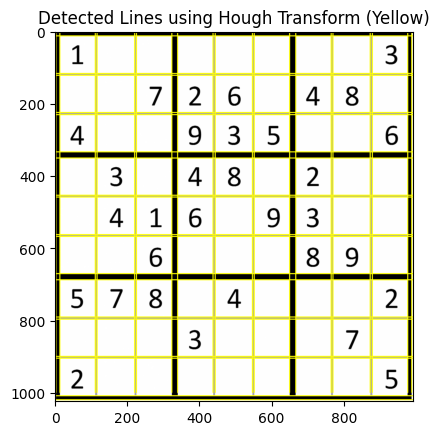

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 50, 150, apertureSize=3)

colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(colored_image, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Yellow color


plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines using Hough Transform (Yellow)')
plt.show()